**Многоклассовая классификация**

1. загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)
подсказка from sklearn.datasets import load_digits
2. Осмотрите данные и метки.
3. попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.
4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации. 
5. Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.
6. Сравните качество стратегий OvR и OvO.


**Логистическая регрессия**

1. Возьмите датасет с данными по телефонной компании с прошлых уроков.
2. Подготовьте данные для обучения.
3. Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)
4. Обучите логистическую регрессию на нормированных данных.
5. Посчитайте метрики на тестовом и обучающем множествах.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.datasets import load_digits 
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

# Загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)
 подсказка from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

# Осмотрите данные и метки.

In [6]:
X = digits.data
Y = digits.target

In [7]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
X.shape

(1797, 64)

# Попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.

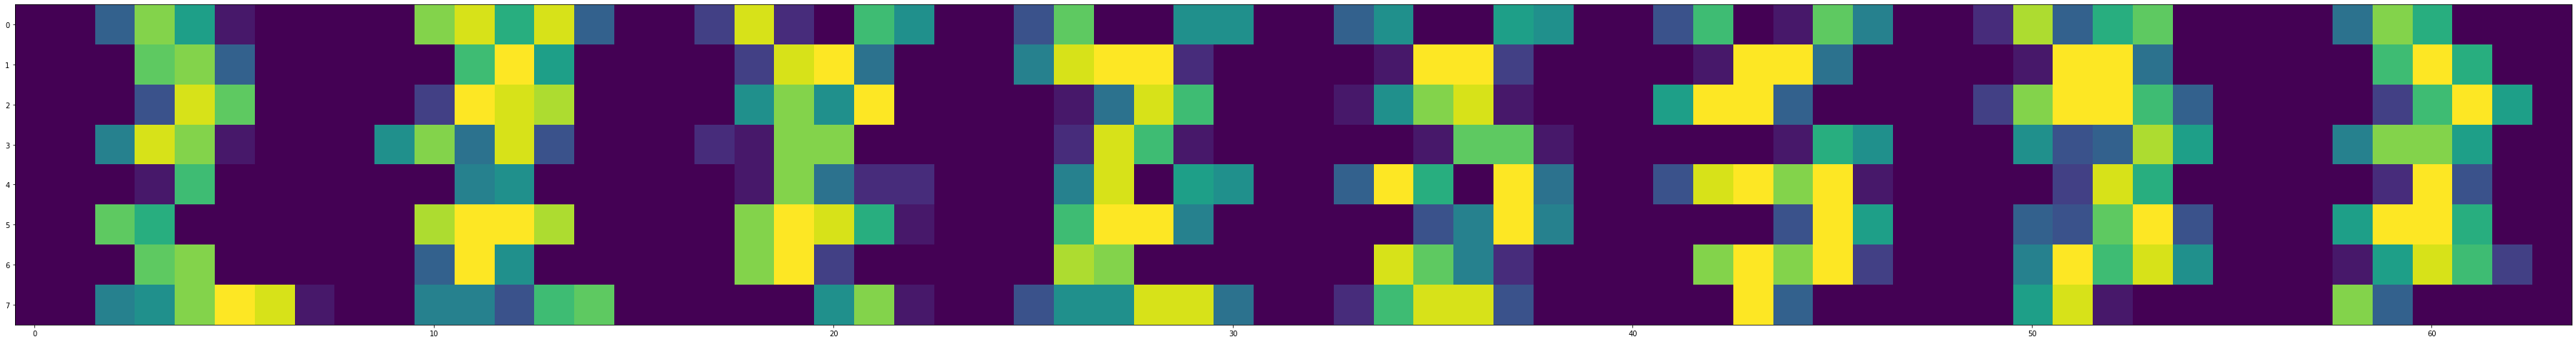

In [14]:
fig, ax = plt.subplots()

ax.imshow(X[:8])

fig.set_figwidth(64)    
fig.set_figheight(64)    

plt.show()

# Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации.

In [2]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [15]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [16]:
SGDclf.score(X,Y)

0.9699499165275459

In [17]:
pred = SGDclf.predict(X)

In [18]:
cm = confusion_matrix(Y, pred)
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]])

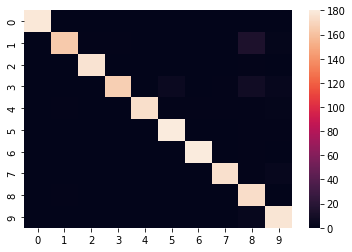

In [19]:
sns.heatmap(cm);

In [20]:
# макро - считает метрики для каждой метки и берет среднее значение. 
precision_score(Y, pred, average = 'macro'), recall_score(Y, pred, average = 'macro'), f1_score(Y, pred, average = 'macro') 

(0.9720937814810465, 0.9702604940886219, 0.9701342616961084)

In [21]:
cm1 = cm

In [22]:
cm1[0,0] = cm1[1,1] = cm1[2,2] = cm1[3,3] = cm1[4,4] = cm1[5,5] = cm1[6,6] = cm1[7,7] = cm1[8,8] = cm1[9,9]= 0 # подсветка ошибок

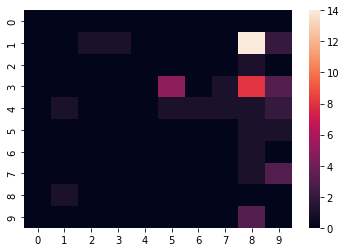

In [23]:
sns.heatmap(cm1); # подсветка ошибок

# Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.

In [24]:
cm = confusion_matrix(Y, pred)
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]])

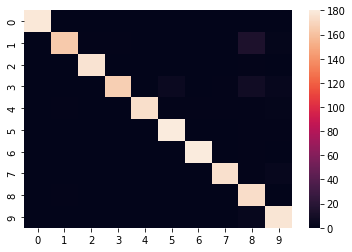

In [25]:
sns.heatmap(cm);

В 14 случаяч, классификатор принял "1" за "8"

В 8 случаях, классификатор принял "3" за "8"

В 3 случаях, классификатор принял "3" за "9"

В 3 случаях, классификатор принял "7" за "9"

В 5 случаях, классификатор принял "3" за "5"

В 3 случаях, классификатор принял "9" за "8"

# Сравните качество стратегий OvR и OvO.

**OvR**

In [26]:
SGDclf.decision_function([X[0]])

array([[ 1942.42587775, -5378.4043211 , -2562.27079009, -1955.58617904,
        -2091.08762485, -1348.40635089, -2061.00294552, -1188.5116464 ,
         -609.24042194,  -781.48905294]])

In [27]:
SGDclf.predict([X[0]])

array([0])

In [28]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**OvO.**

In [29]:
from sklearn.multiclass import OneVsOneClassifier 

In [30]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [31]:
ovoSGD.decision_function([X[0]])

array([[ 9.33332762, -0.33332781,  1.66668678,  5.33298992,  2.66668518,
         8.33331562,  1.6667318 ,  2.66670342,  6.33331807,  7.33329666]])

In [32]:
ovoSGD.predict([X[0]])

array([0])

In [34]:
pred = ovoSGD.predict(X)

In [35]:
precision_score(Y, pred, average = 'macro'), recall_score(Y, pred, average = 'macro'), f1_score(Y, pred, average = 'macro') # кажется тут что-то не работает

(1.0, 1.0, 1.0)

OvR показывает лучший результат 1900 самое большое, а следующее по близости -600 

OvO показывает 9.3, следующее значение 8.3, то есть почти принял 0 за 5

# Возьмите датасет с данными по телефонной компании с прошлых уроков.

In [36]:
df = pd.read_csv('drive/MyDrive/ColabNotebooks/homework/Data/churn-bigml-80.csv')

In [37]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
df.shape

(2666, 20)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

# Подготовьте данные для обучения.

In [40]:
dict = {'Yes': 1, 'No': 0}

In [41]:
df['International plan'] = df['International plan'].map(dict)
df['Voice mail plan'] = df['Voice mail plan'].map(dict)

In [42]:
df.State.value_counts() # удалю пожалуй

WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

In [43]:
df = df.drop(['State'], axis = 1)

In [44]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [45]:
df.shape

(2666, 19)

# Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)

In [46]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

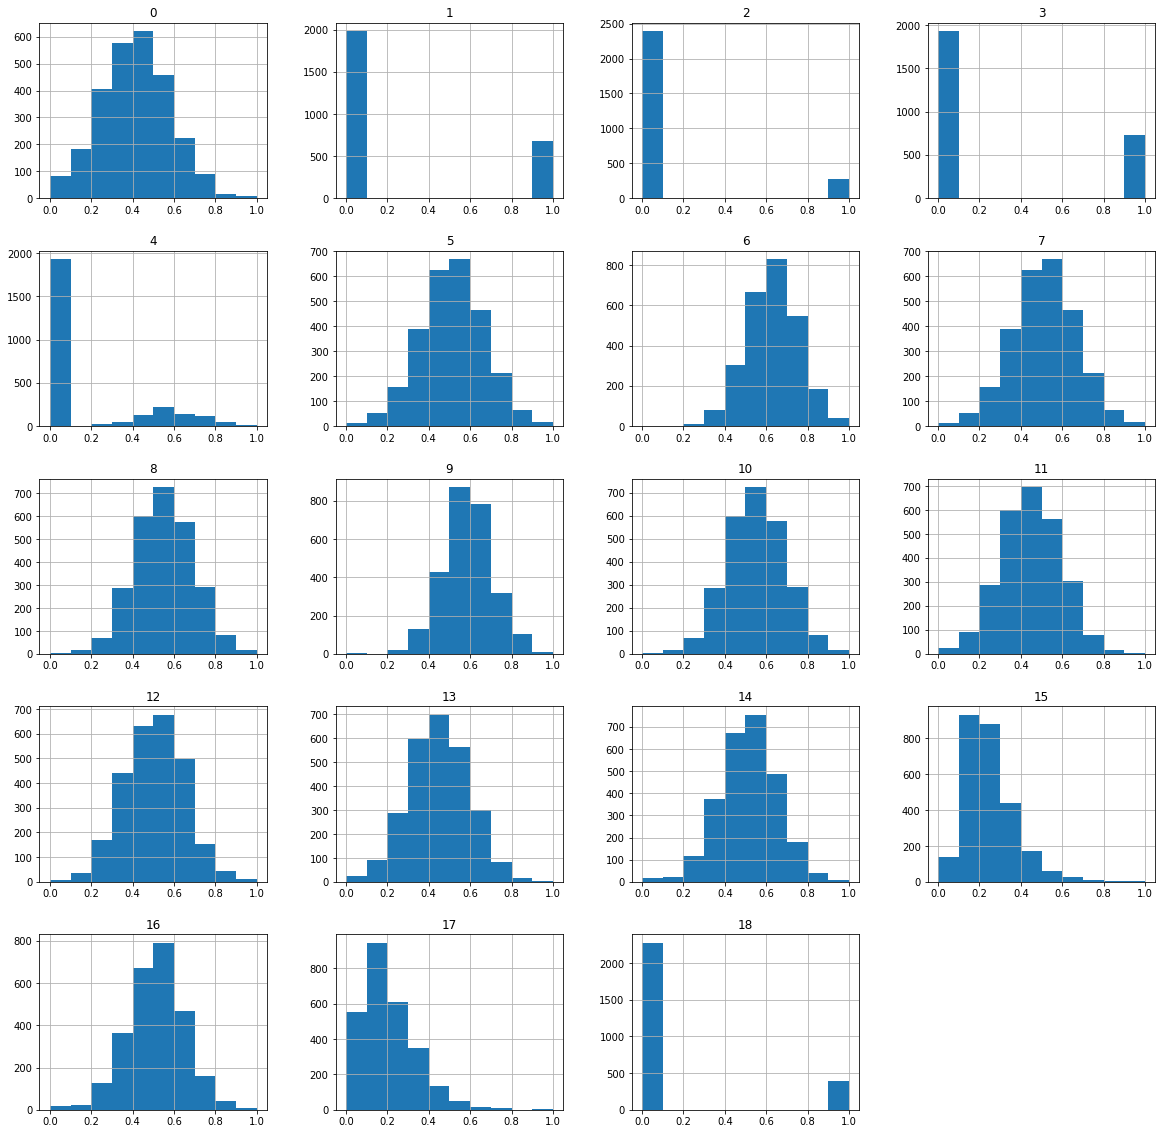

In [47]:
data = df.values
trans = MinMaxScaler()
data = trans.fit_transform(data)
df = DataFrame(data)

plt.rcParams["figure.figsize"] = (20, 20)

df.hist()
plt.show()

In [48]:
df.shape

(2666, 19)

# Обучите логистическую регрессию на нормированных данных

In [49]:
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression()

In [50]:
df.head(19)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.524793,0.068627,0.0,1.0,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.068627,0.0,1.0,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.068627,0.0,0.0,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,0.000000,1.0,0.0,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,0.068627,1.0,0.0,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333,0.0
5,0.483471,1.000000,1.0,0.0,0.00,0.636830,0.61250,0.636821,0.606544,0.594118,0.606600,0.456020,0.639098,0.456329,0.315,0.30,0.314815,0.000000,0.0
6,0.495868,1.000000,0.0,1.0,0.48,0.622007,0.55000,0.621898,0.958207,0.635294,0.958266,0.480786,0.639098,0.481013,0.375,0.35,0.375926,0.333333,0.0
7,0.603306,0.068627,1.0,0.0,0.00,0.447548,0.49375,0.447518,0.283475,0.552941,0.283403,0.478508,0.473684,0.478481,0.355,0.30,0.355556,0.000000,0.0
8,0.578512,0.068627,1.0,1.0,0.74,0.737172,0.52500,0.737089,0.610393,0.652941,0.610482,0.804725,0.481203,0.805063,0.560,0.25,0.559259,0.000000,0.0
9,0.301653,0.068627,0.0,0.0,0.00,0.535063,0.79375,0.535044,0.449271,0.870588,0.449369,0.433533,0.458647,0.433544,0.455,0.25,0.455556,0.000000,0.0


In [51]:
X = df.drop([18], axis = 1)
y = df[18]

In [ ]:
y.shape, X.shape

((2666,), (2666, 18))

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [63]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [66]:
logReg.score(X_test, y_test)

0.8665667166416792

In [65]:
logReg.predict(X_test) # это получается неправильно?

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
logReg.predict_proba(X[[16]])

In [ ]:
Xnew = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = logReg.predict_proba(Xnew)
plt.plot(Xnew, y_proba[:,1], 'g-', label = 'отказался')
plt.plot(Xnew, y_proba[:,0], 'b--', label = 'не отказался');
plt.legend()

# Посчитайте метрики на тестовом и обучающем множествах.